In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
dire = 'catRawMags1305/catDir/'

In [3]:
dith1 = np.genfromtxt('catRawMags1305/catDir/jdan21l8q_HOROLOGIUM-I_F814W_oc.dat',names=True)
dith2 = np.genfromtxt('catRawMags1305/catDir/jdan21laq_HOROLOGIUM-I_F814W_oc.dat',names=True)
dith3 = np.genfromtxt('catRawMags1305/catDir/jdan21lhq_HOROLOGIUM-I_F814W_oc.dat',names=True)
dith4 =np.genfromtxt('catRawMags1305/catDir/jdan21llq_HOROLOGIUM-I_F814W_oc.dat',names=True)

In [4]:
d1_cat = np.genfromtxt('catRawMags1305/catDir/jdan21l8q_HOROLOGIUM-I_F814W_oc.dat')
d2_cat = np.genfromtxt('catRawMags1305/catDir/jdan21laq_HOROLOGIUM-I_F814W_oc.dat')
d3_cat = np.genfromtxt('catRawMags1305/catDir/jdan21lhq_HOROLOGIUM-I_F814W_oc.dat')
d4_cat = np.genfromtxt('catRawMags1305/catDir/jdan21llq_HOROLOGIUM-I_F814W_oc.dat')

In [6]:
d1_idx = np.argsort(dith1['magr'])[:1000]
d2_idx = np.argsort(dith2['magr'])[:1000]
d3_idx = np.argsort(dith3['magr'])[:1000]
d4_idx = np.argsort(dith4['magr'])[:1000]

In [48]:
d1_idx2 = np.argsort(dith1['magr'])[:50]
d2_idx2 = np.argsort(dith2['magr'])[:50]
d3_idx2 = np.argsort(dith3['magr'])[:50]
d4_idx2 = np.argsort(dith4['magr'])[:50]

In [7]:
d1_1000=dith1[d1_idx]
d2_1000=dith2[d2_idx]
d3_1000=dith3[d3_idx]
d4_1000=dith4[d4_idx]

In [49]:
d1_50=dith1[d1_idx2]
d2_50=dith2[d2_idx2]
d3_50=dith3[d3_idx2]
d4_50=dith4[d4_idx2]

In [8]:
d1_cat1000 = d1_cat[d1_idx]
d2_cat1000 = d2_cat[d2_idx]
d3_cat1000 = d3_cat[d3_idx]
d4_cat1000 = d4_cat[d4_idx]

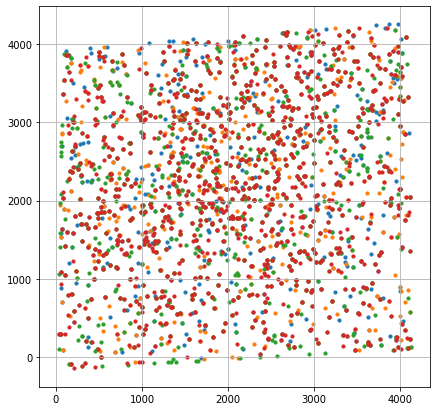

In [10]:
fig,ax = plt.subplots(figsize=(7,7))

ax.grid(True)
ax.scatter(d1_1000['xo'],d1_1000['yo'],label='Dith1',s=10)   #c=d1_50['magr'])
ax.scatter(d2_1000['xo'],d2_1000['yo'],label='Dith2',s=10)   #c=d1_50['magr'])
ax.scatter(d3_1000['xo'],d3_1000['yo'],label='Dith3',s=10)   #c=d1_50['magr'])
ax.scatter(d4_1000['xo'],d4_1000['yo'],label='Dith4',s=10)   #c=d1_50['magr'])

plt.show()

In [29]:
d1_1000.dtype.names

('flags',
 'RA',
 'DEC',
 'xr',
 'yr',
 'flux',
 'c_star',
 'magr',
 'id',
 'xc',
 'yc',
 'xo',
 'yo')

In [53]:
matchtol=5
cat_arr = np.array([d2_1000,d3_1000,d4_1000])

master = d1_1000
d1_cat1000 = d1_cat[d1_idx]

colNs = np.array(master.dtype.names)

xt = np.int(np.where(colNs=='xo')[0])
yt = np.int(np.where(colNs=='yo')[0])
xtstr = 'xo'
ytstr = 'yo'

magr = np.int(np.where(colNs=='magr')[0])
id = np.int(np.where(colNs=='id')[0])

# Create an array of zeros with columns equal to the number of non-master dithers to store the matching id for each source
matchids = np.zeros((len(d1_cat1000), 3))
# master = np.hstack((d1_cat1000, matchids))
mult_count = 0
# Loop through other images
for dd in range(3):
    cat = cat_arr[dd] 

    nF = True
    row = 0

    while (nF): # not finished
        matchrows = cat[(abs(master[row]['xo'] - cat['xo']) <= matchtol) & \
                        (abs(master[row]['yo'] - cat['yo']) <= matchtol)]

#         # Setting the proper column number to the matching index.
        if (len(matchrows) == 1):
            matchids[row][dd] = matchrows[0][id]
            row = row + 1
#             print('matched')

        elif (len(matchrows) > 1):
            magDif = np.zeros((len(matchrows),1))
            for mm in range(len(matchrows)):
                magDif[mm] = master[row][magr] - matchrows[mm][magr]
                small = np.argmin(magDif)
                matchids[row][dd] = matchrows[small][id]
            row += 1
            mult_count += 1
#             print('magDiff')

        else:
            master = np.delete(master, row, 0)
            d1_cat1000 = np.delete(d1_cat1000, row, 0)
            matchids = np.delete(matchids,row,0)
#             print('deleted')

        if (row >= len(master)):
            nF = False
            print(len(master))

print(mult_count)
# master = np.hstack((d1_cat1000, matchids))
# header =  "flags RA DEC xr yr flux c_star magr id xc yc xt yt id2 id3 id4"
# form = "%d %1.7f %1.7f %1.4f %1.4f %1.4f %1.3f %1.4f %d %1.4f %1.4f %1.4f %1.4f %d %d %d"

# np.savetxt(dire+'matched1000.dat',master, header=header, fmt=form)
# print(master[0])

655
577
566
6


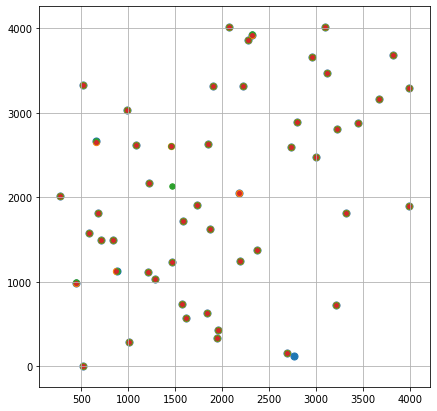

In [50]:
fig,ax = plt.subplots(figsize=(7,7))

ax.grid(True)
# ax.scatter(d1_cat1000[:,11],d1_cat1000[:,12],label='Dith1',s=50)   #c=d1_1000['magr'])
ax.scatter(d1_50['xo'],d1_50['yo'],label='Dith1',s=50)
ax.scatter(d2_50['xo'],d2_50['yo'],label='Dith2',s=40)
ax.scatter(d3_50['xo'],d3_50['yo'],label='Dith3',s=30)
ax.scatter(d4_50['xo'],d4_50['yo'],label='Dith4',s=15)

plt.show()

In [22]:
# cat_arrA = np.array([d1_g,d2_g,d3_g,d4_g])
cat_arrA = np.array([d1_cat,d2_cat,d3_cat,d4_cat])

In [52]:
xr = np.int(np.where(colNs=='xr')[0])
yr = np.int(np.where(colNs=='yr')[0])
xc = np.int(np.where(colNs=='xc')[0])
yc = np.int(np.where(colNs=='yc')[0])

print(xr,yr)
print(xc,yc)
print(xt,yt)

3 4
9 10
11 12


In [55]:
master = np.genfromtxt(dire+'matched1000.dat',names=True)
masterCat = np.loadtxt(dire+'matched1000.dat')

colNs = np.array(master.dtype.names)

ra_id = np.int(np.where(colNs=='RA')[0])
dec_id = np.int(np.where(colNs=='DEC')[0])
flu_id = np.int(np.where(colNs=='flux')[0])
fla_id = np.int(np.where(colNs=='flags')[0])
cs_id = np.int(np.where(colNs=='c_star')[0])
magr = np.int(np.where(colNs=='magr')[0])

xr = np.int(np.where(colNs=='xr')[0])
yr = np.int(np.where(colNs=='yr')[0])
xc = np.int(np.where(colNs=='xc')[0])
yc = np.int(np.where(colNs=='yc')[0])

id2 = np.int(np.where(colNs=='id2')[0])
id3 = np.int(np.where(colNs=='id3')[0])
id4 = np.int(np.where(colNs=='id4')[0])
# xt, yt are xo,yo in dithers 2-4 as the transformed positions 
# don't change for the first dither
xt = np.int(np.where(colNs=='xt')[0])
yt = np.int(np.where(colNs=='yt')[0])

id = np.int(np.where(colNs=='id')[0])
coordRows = masterCat[:,[ra_id,dec_id,flu_id,fla_id,cs_id]]

nCo = 4*int(9) # 4 is number of dithers
newCols = np.zeros((len(coordRows), nCo))

# rowsMast = np.transpose(masterCat)

jj = 0
cc = 0
while jj < 4:
    cat = cat_arrA[jj]

    if jj==0:
        idcol = id
    elif jj==1:
        idcol = id2
    elif jj==2:
        idcol = id3
    elif jj==3:
        idcol = id4

    newIDcol = masterCat[:,idcol]
    idx = np.asarray(newIDcol,int)

    reg = cat[idx]

    newCols[:,cc] = reg[:,magr]
    newCols[:,cc+jj+4] = reg[:,ra_id]
    newCols[:,cc+jj+5] = reg[:,dec_id]

    newCols[:,cc+jj+12] = reg[:,xr]
    newCols[:,cc+jj+13] = reg[:,yr]

    newCols[:,cc+jj+20] = reg[:,xc]
    newCols[:,cc+jj+21] = reg[:,yc]

    newCols[:,cc+jj+28] = reg[:,xt]
    newCols[:,cc+jj+29] = reg[:,yt]

    cc += 1
    jj += 1


magList = np.hstack((coordRows, newCols))

header = 'RA DEC flux flags c_star mag1 mag2 mag3 mag4 ra1 '
header += 'dec1 ra2 dec2 ra3 dec3 ra4 dec4 xr1 yr1 xr2 yr2 xr3 yr3 xr4 yr4 '
header += 'xc1 yc1 xc2 yc2 xc3 yc3 xc4 yc4 xt1 yt1 xt2 yt2 xt3 yt3 xt4 yt4'

form = '%1.7f %1.7f %1.4f %d %1.3f %1.4f %1.4f %1.4f %1.4f ' 
form +='%1.7f %1.7f %1.7f %1.7f %1.7f %1.7f %1.7f %1.7f %1.4f %1.4f ' 
form +='%1.4f %1.4f %1.4f %1.4f %1.4f %1.4f %1.4f %1.4f %1.4f %1.4f '
form +='%1.4f %1.4f %1.4f %1.4f %1.4f %1.4f %1.4f %1.4f %1.4f %1.4f '
form +='%1.4f %1.4f'

np.savetxt(dire+'matched_w_MagsPos1000.dat',magList,header=header,fmt=form)

In [56]:
file = np.genfromtxt(dire+'matched_w_MagsPos1000.dat',names=True)

In [63]:
indices = dict(zip(file.dtype.names,np.arange(0,len(file.dtype.names)+1,1)))

In [66]:
indices['RA']

0

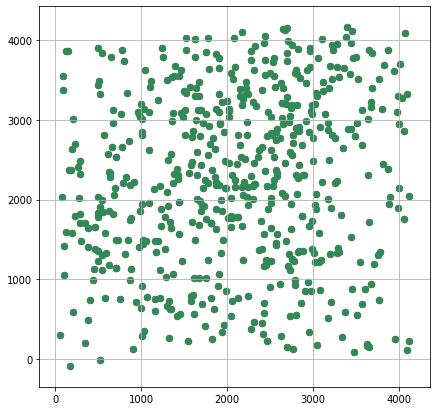

In [57]:
fig,ax = plt.subplots(figsize=(7,7))

ax.grid(True)
# ax.scatter(d1_catthou[:,11],d1_catthou[:,12],label='Dith1',s=50)   #c=d1_thou['magr'])
ax.scatter(file['xt1'],file['yt1'],s=40,color='indianred')
ax.scatter(file['xc1'],file['yc1'],s=40,color='seagreen')
# ax.scatter(file['xt3'],file['yt3'],s=30,color='mediumturquoise')
# ax.scatter(file['xt4'],file['yt4'],s=15,color='silver')


plt.show()

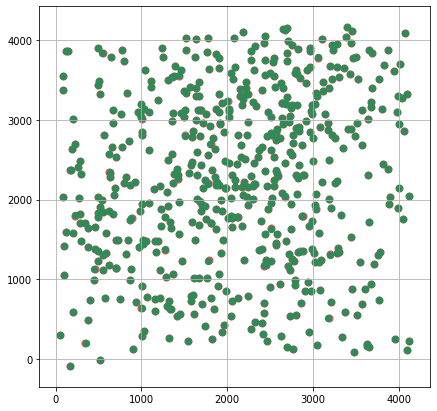

In [58]:
fig,ax = plt.subplots(figsize=(7,7))

ax.grid(True)
# ax.scatter(d1_catthou[:,11],d1_catthou[:,12],label='Dith1',s=50)   #c=d1_thou['magr'])
ax.scatter(file['xt1'],file['yt1'],s=50,color='indianred')
ax.scatter(file['xt4'],file['yt4'],s=40,color='seagreen')
# ax.scatter(file['xt3'],file['yt3'],s=30,color='mediumturquoise')
# ax.scatter(file['xt4'],file['yt4'],s=15,color='silver')


plt.show()

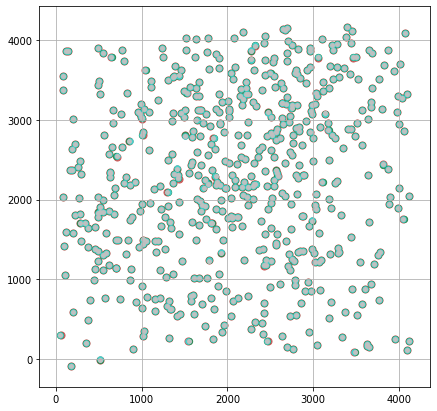

In [59]:
fig,ax = plt.subplots(figsize=(7,7))

ax.grid(True)
# ax.scatter(d1_catthou[:,11],d1_catthou[:,12],label='Dith1',s=50)   #c=d1_thou['magr'])
ax.scatter(file['xt1'],file['yt1'],s=50,color='indianred')
ax.scatter(file['xt2'],file['yt2'],s=40,color='seagreen')
ax.scatter(file['xt3'],file['yt3'],s=30,color='mediumturquoise')
ax.scatter(file['xt4'],file['yt4'],s=15,color='silver')


plt.show()

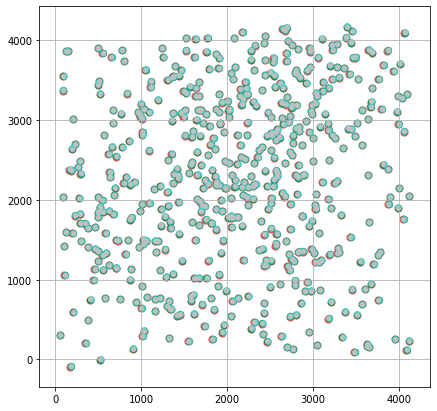

In [60]:
fig,ax = plt.subplots(figsize=(7,7))

ax.grid(True)
# ax.scatter(d1_catthou[:,11],d1_catthou[:,12],label='Dith1',s=50)   #c=d1_thou['magr'])
ax.scatter(file['xc1'],file['yc1'],s=50,color='indianred')
ax.scatter(file['xc2'],file['yc2'],s=40,color='seagreen')
ax.scatter(file['xc3'],file['yc3'],s=30,color='mediumturquoise')
ax.scatter(file['xc4'],file['yc4'],s=15,color='silver')


plt.show()

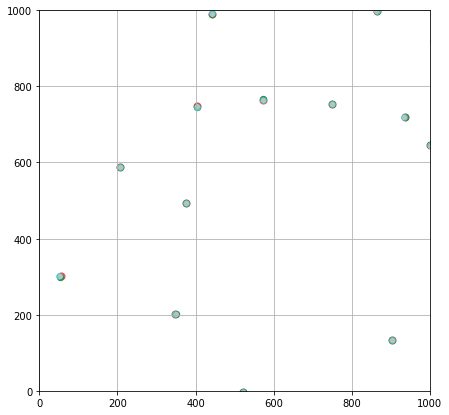

In [61]:
fig,ax = plt.subplots(figsize=(7,7))

ax.grid(True)
# ax.scatter(d1_catthou[:,11],d1_catthou[:,12],label='Dith1',s=50)   #c=d1_thou['magr'])
ax.scatter(file['xt1'],file['yt1'],s=50,color='indianred')
ax.scatter(file['xt2'],file['yt2'],s=40,color='seagreen')
ax.scatter(file['xt3'],file['yt3'],s=30,color='mediumturquoise')
ax.scatter(file['xt4'],file['yt4'],s=15,color='silver')

ax.set_ylim(0,1000)
ax.set_xlim(0,1000)

plt.show()

In [75]:
file = np.genfromtxt(dire+'matched_w_MagsPos2705r2.dat',names=True)

In [101]:
file = np.genfromtxt(dire+'jdan21l8q_HOROLOGIUM-I_F814W_at_2705r2.dat',\
                    names=True)

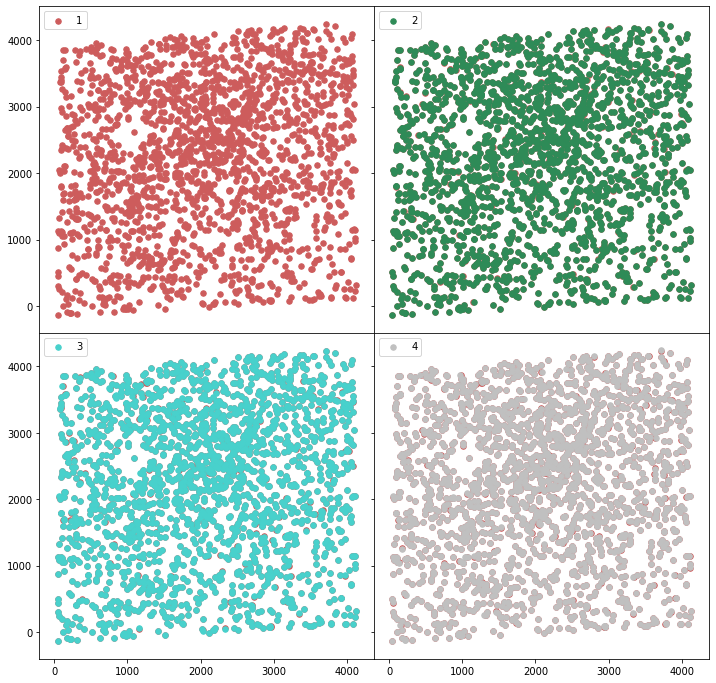

In [76]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(12,12),\
                                          sharex=True,sharey=True)

ax1.scatter(file['xt1'],file['yt1'],s=30,color='indianred',label='1')
ax2.scatter(file['xt1'],file['yt1'],s=30,color='indianred')
ax3.scatter(file['xt1'],file['yt1'],s=30,color='indianred')
ax4.scatter(file['xt1'],file['yt1'],s=30,color='indianred')


ax2.scatter(file['xt2'],file['yt2'],s=30,color='seagreen',label='2')
ax3.scatter(file['xt3'],file['yt3'],s=30,color='mediumturquoise',label='3')
ax4.scatter(file['xt4'],file['yt4'],s=30,color='silver',label='4')

plt.subplots_adjust(hspace=0,wspace=0)


ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

plt.show()


In [104]:
transFD = np.genfromtxt(dire+'jdan21l8q_HOROLOGIUM-I_F814W_t_2905rdrc1000.dat')

In [102]:
file1000 = np.argsort(file['magr'])[:1000]

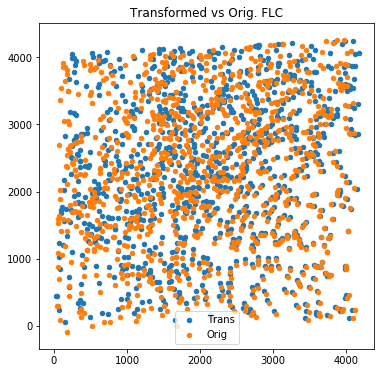

In [111]:
fig,ax = plt.subplots(figsize=(6,6))

ax.scatter(transFD[:,0],transFD[:,1],s=20,label='Trans')
ax.scatter(file['xt'][file1000],file['yt'][file1000],s=20,label='Orig')

ax.set_title('Transformed vs Orig. FLC')
ax.legend()
plt.show()

In [110]:
drc = np.genfromtxt('drc1000.reg')

In [117]:
xd = np.array([1833.02,1921.60,1574.42,1999.06,3211.35,3348.24])
yd = np.array([706.45,2705.68,827.22,3386.51,3485.06,1829.24])

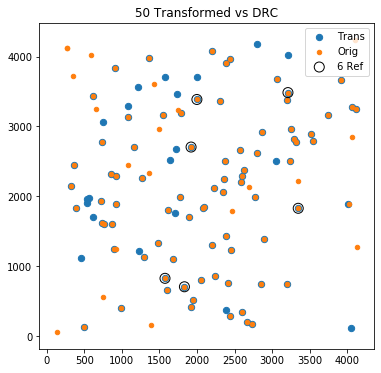

In [129]:
fig,ax = plt.subplots(figsize=(6,6))

ax.scatter(transFD[:,0][:100],transFD[:,1][:100],s=40,label='Trans')
ax.scatter(drc[:,0][:100],drc[:,1][:100],s=20,label='Orig')
ax.scatter(xd,yd,s=100,marker='o',facecolor='None',\
           edgecolor='black',label='6 Ref')

ax.set_title('50 Transformed vs DRC')
ax.legend()
plt.show()

# Need to match with DRC